In [4]:
import rebound
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=0.,a=1.,e=1.e-15, f=0.3)
print(sim.particles[1])
o = sim.calculate_orbits()
print(o[0])
print(sim.particles[1])
orbs = sim.calculate_orbits()


<rebound.Particle object, id=-1 m=0.0 x=0.9553364891256051 y=0.29552020666133927 z=0.0 vx=-0.29552020666133955 vy=0.955336489125607 vz=0.0>
<rebound.Orbit instance, a=0.9999999999999996 e=7.447602459741814e-16 inc=0.0 Omega=3.141592653589793 omega=3.141592653589793 f=0.4636476090008069>
<rebound.Particle object, id=-1 m=0.0 x=0.9553364891256051 y=0.29552020666133927 z=0.0 vx=-0.29552020666133955 vy=0.955336489125607 vz=0.0>


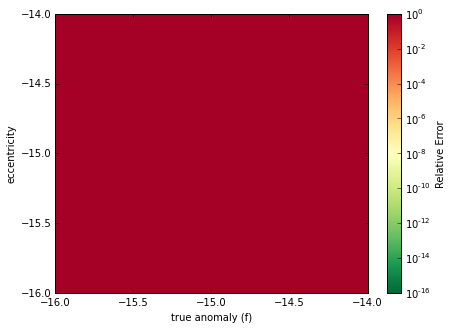

In [1]:
import rebound
import random
import numpy as np

def simulation(par):
    e,f = par
    e = 10**e
    f = 10**f
    sim = rebound.Simulation()
    sim.add(m=1.)
    inc = 0.3
    Omega = random.random()*2*np.pi
    omega = random.random()*2*np.pi
    sim.add(m=0.,a=1.,e=e,inc=inc,Omega=Omega, omega=omega,f=f)
    o=sim.calculate_orbits()[0]
    if o.omega < 0:
        o.omega += 2*np.pi
    if o.Omega < 0:
        o.Omega += 2*np.pi
    if o.f < 0:
        o.f += 2*np.pi
    return np.sqrt((o.a-1.)**2 + ((o.e-e)/e)**2 + ((o.inc-inc)/inc)**2 + ((o.Omega-Omega)/Omega)**2 + ((o.omega-omega)/omega)**2 + ((o.f-f)/f)**2)

random.seed(71)
N = 10
es = np.linspace(-16.,-14.,N)
fs = np.linspace(-16.,-14.,N)
params = [(e,f) for e in es for f in fs]

pool=rebound.InterruptiblePool()
res = pool.map(simulation, params)
res = np.array(res).reshape(N,N)
res = np.nan_to_num(res)

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.colors import LogNorm
import matplotlib

f,ax = plt.subplots(1,1,figsize=(7,5))
extent=[fs.min(), fs.max(), es.min(), es.max()]

ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.set_xlabel(r"true anomaly (f)")
ax.set_ylabel(r"eccentricity")

im = ax.imshow(res, norm=LogNorm(), vmax=1., vmin=1.e-16, aspect='auto', origin="lower", interpolation='nearest', cmap="RdYlGn_r", extent=extent)
cax,kw = matplotlib.colorbar.make_axes([ax])
cb = plt.colorbar(im, cax=cax, **kw)
cb.solids.set_rasterized(True)
cb.set_label("Relative Error")

In [2]:
print(res)

[[  3.12011158e+16   1.93317718e+16   1.10659770e+16   6.46736255e+15
    4.71929938e+15   1.21621055e+15   2.89722451e+13   1.31125023e+15
    7.86073859e+14   3.28895413e+14]
 [  4.71238898e+16   2.13056888e+16   5.64514930e+15   3.38417810e+15
    6.08628441e+15   1.48979118e+14   2.81643609e+15   4.37083409e+14
    1.81726137e+13   6.03820664e+14]
 [  2.44978663e+15   9.41667658e+15   1.22756053e+16   4.95993065e+14
    7.45326944e+15   2.24274302e+15   1.55815833e+15   1.65620419e+15
    2.62024620e+14   6.00901786e+14]
 [  5.88396454e+16   3.07169411e+15   5.64514930e+15   4.20734532e+13
    2.49119669e+14   4.41518364e+15   5.41466567e+13   5.99245592e+13
    2.58550148e+13   1.75763148e+12]
 [  7.79666338e+14   3.07169411e+15   2.09199538e+16   7.13324873e+14
    6.04971071e+13   1.08712846e+00   2.89263505e+14   8.69266922e+12
    6.32474779e+13   6.17424335e+14]
 [  6.21687641e+16   7.14726375e+14   6.01642350e+12   1.06512769e+14
    8.08478072e+15   4.76855864e+15   2.88742